<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("insurance_data.csv")
df.head()

age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1

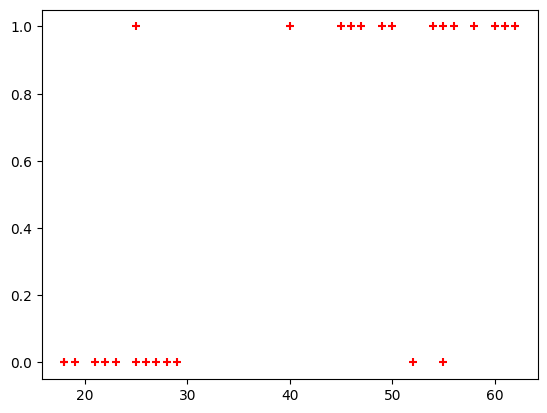

In [4]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [7]:
X_test

age
15   55
16   25
13   29
18   19
19   18
4    46

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [9]:
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
X_test

age
15   55
16   25
13   29
18   19
19   18
4    46

In [11]:
y_predicted = model.predict(X_test)

In [12]:
model.predict_proba(X_test)

array([[0.11405138, 0.88594862],
       [0.93519444, 0.06480556],
       [0.88494481, 0.11505519],
       [0.97374358, 0.02625642],
       [0.97747947, 0.02252053],
       [0.34655926, 0.65344074]])

In [13]:
model.score(X_test,y_test)

0.8333333333333334

In [14]:
y_predicted

array([1, 0, 0, 0, 0, 1])

In [15]:
X_test

age
15   55
16   25
13   29
18   19
19   18
4    46

**model.coef_ indicates value of m in y=m*x + b equation**

In [16]:
model.coef_

array([[0.15731243]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [17]:
model.intercept_

array([-6.60217388])

In [18]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [21]:
model.nb_epoch

AttributeError: 'LogisticRegression' object has no attribute 'nb_epoch'

In [19]:
import json

model_params = {
    'coef': model.coef_.tolist(),
    'intercept': model.intercept_.tolist(),
    'iters': model.n_iter_[0],
}

# Custom JSON encoder to handle numpy types
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NumpyEncoder, self).default(obj)

# Save to JSON file
with open('logistic_regression_model.json', 'w') as f:
    json.dump(model_params, f, indent=4, cls=NumpyEncoder)

NameError: name 'np' is not defined

**Lets defined sigmoid function now and do the math with hand**

In [43]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [75]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [76]:
age = 35
prediction_function(age)

0.4850044983805899

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**

In [77]:
age = 43
prediction_function(age)

0.568565299077705

**0.485 is more than 0.5 which means person with 43 will buy the insurance**

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model